In [1]:
using Graphs
using DocStringExtensions
using CairoMakie
using Revise
using RNAStructPlot
using LinearAlgebra

sequence = "CGCUUCAUAUAAUCCUAAUGAUAUGGUUUGGGAGUUUCUACCAAGAGCCUUAAACUCUUGAUUAU"
notation = "(((((((..((((((.........))))))......).((((((.......))))))..))))))"

rnabase = dotbracketbase(
    sequence, 
    notation
)

RNABaseGraph(SimpleGraph{Int64}(83, [[2, 65], [1, 3, 64], [2, 4, 63], [3, 5, 62], [4, 6, 61], [5, 7, 60], [6, 8, 37], [7, 9], [8, 10], [9, 11, 30]  …  [40, 55, 57], [39, 56, 58], [57, 59], [58, 60], [6, 59, 61], [5, 60, 62], [4, 61, 63], [3, 62, 64], [2, 63, 65], [1, 64]]), Dict{Any, Char}(5 => 'U', 56 => 'U', 16 => 'U', 20 => 'G', 35 => 'U', 55 => 'C', 60 => 'G', 30 => 'G', 19 => 'U', 32 => 'G'…), Dict{Any, Any}(5 => 61, 39 => 57, 7 => 37, 12 => 28, 1 => 65, 40 => 56, 13 => 27, 41 => 55, 43 => 53, 11 => 29…))

In [2]:
function generate_circular(graph)
    placements = Dict()
    for (i, vertex) in enumerate(vertices(graph))
        x = (i-1)/nv(graph) * 2 * pi
        placements[vertex] = [cos(x), sin(x)]
    end
    return placements
end

generate_circular (generic function with 1 method)

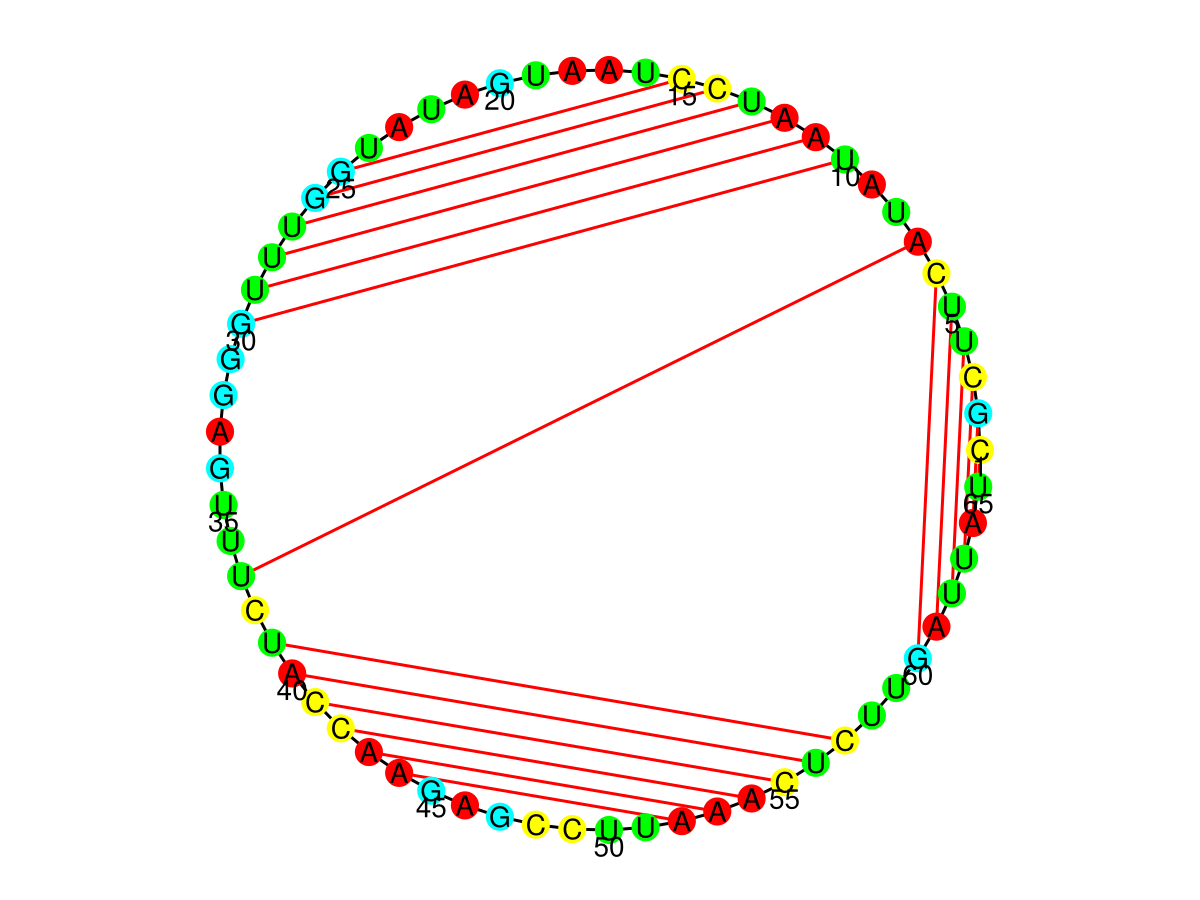

In [3]:
using RNAStructPlot

coords = generate_circular(rnabase.graph)

draw_final(rnabase.graph, coords, rnabase.nucleotides, rnabase.pairings)

In [4]:
function bezier2(p1, p2, p3)
    return t -> (1-t)*((1-t)*p1+t*p2) + t*((1-t)*p2+t*p3)
end

bezier2 (generic function with 1 method)

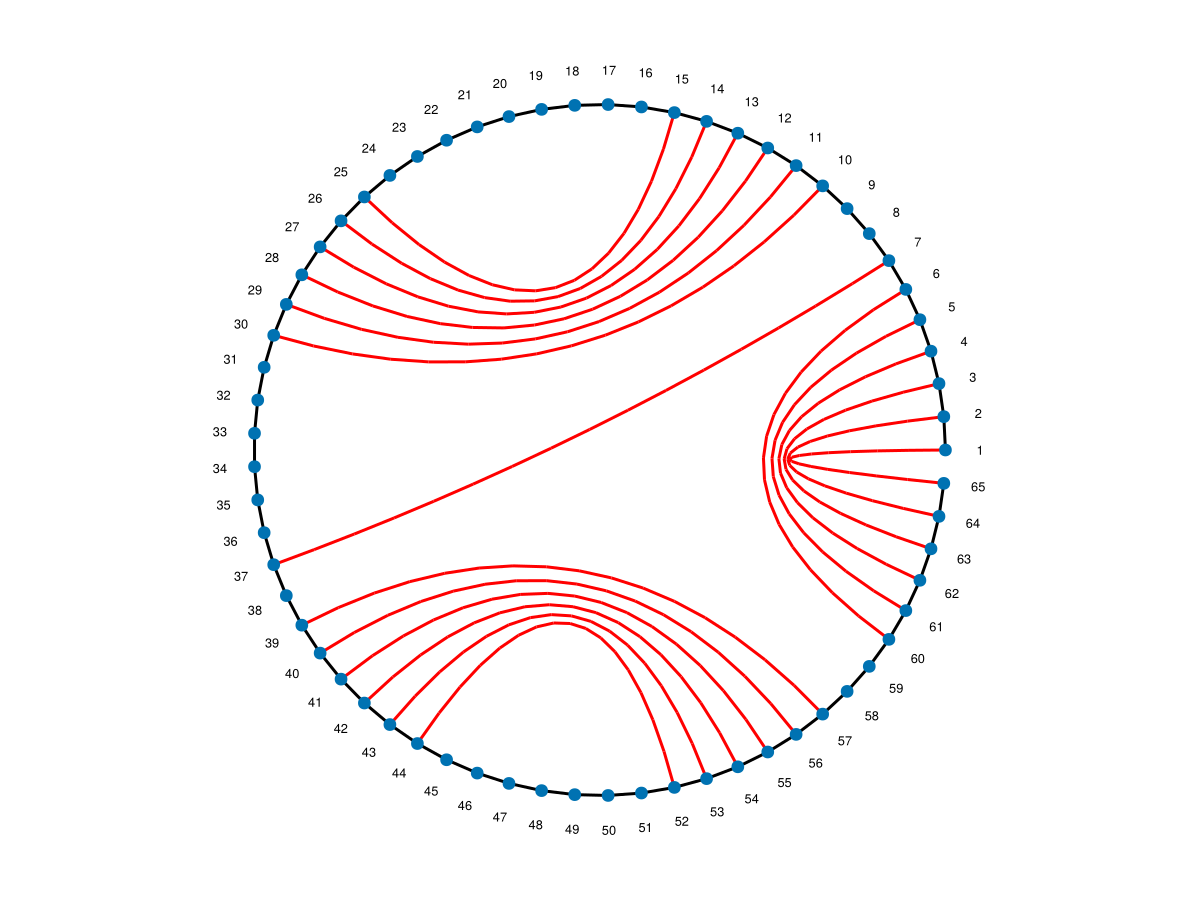

In [5]:
function draw_bezier(g, p)
    f = Figure()
    ax = Axis(f[1,1], aspect = DataAspect())
    for e in edges(g)
        start = srcx, srcy = p[src(e)]
        stop = dstx, dsty = p[dst(e)]

        if abs(src(e) - dst(e)) == 1
            lines!([srcx, dstx], [srcy, dsty];color=:black)
        else
            mid = (start + (stop - start)/2)/10
            #mid = [0, 0]
            #length = norm(stop-start)
            bez = bezier2(start, mid, stop)

            intervals = 16
            for i in range(1, intervals)
                x = (i-1)/intervals
                currx, curry = bez(x)
                nextx, nexty = bez(i/intervals)

                lines!([currx, nextx], [curry, nexty];color=:red)
            end
        end
    end

    # draw markers
    x = map(v -> p[v][1], vertices(g))
    y = map(v -> p[v][2], vertices(g))
    scatter!(x, y)

    # place labels
    for v in vertices(g)
        vx, vy = p[v]*1.1
        text!(vx, vy,text=string(v),align=(:center, :center),fontsize=1/nv(g),markerspace=:relative)
    end

    ax.aspect = 1
    hidedecorations!(ax)
    hidespines!(ax)

    current_figure()
end

draw_bezier(rnabase.graph, coords)